In [1]:
import numpy as np
from scipy import signal
import pandas as pd

import matplotlib.pyplot as plt

# Intro

In this file we explore the effects of different windows

## Rectangular Window

0.5
5000.0


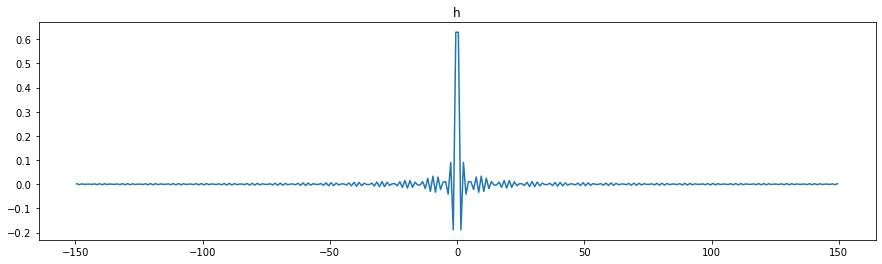

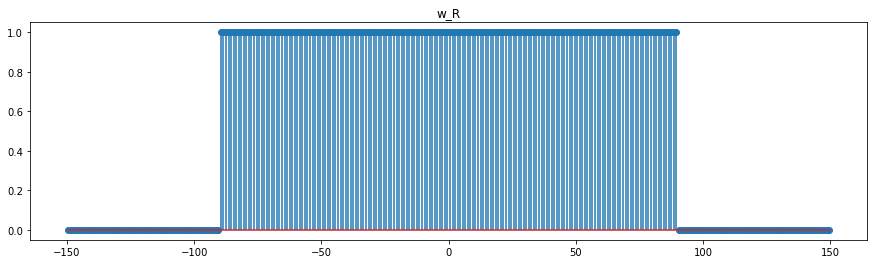

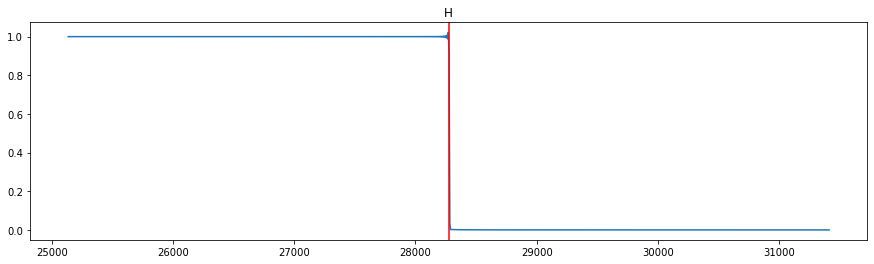

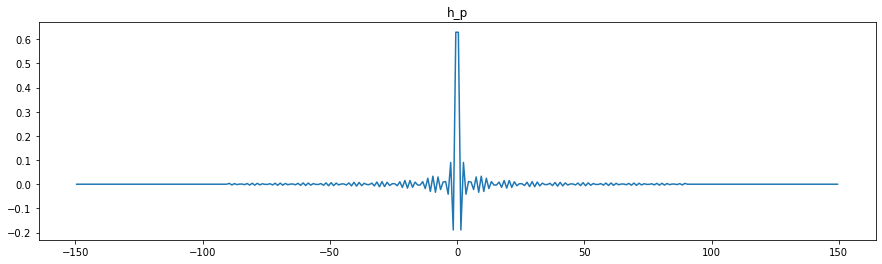

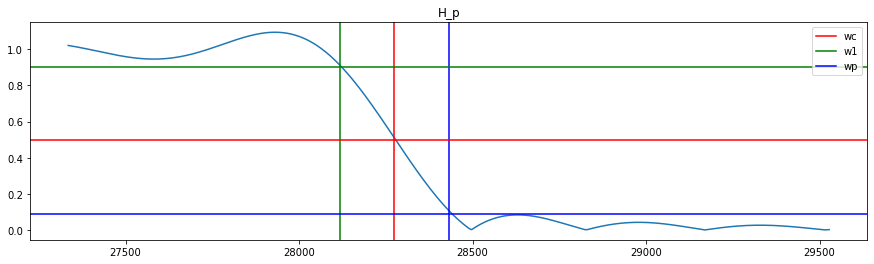

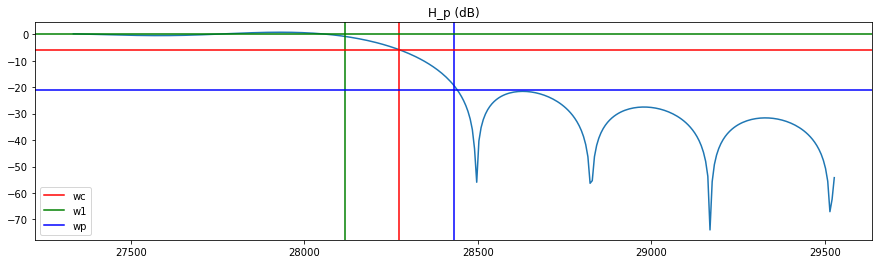

In [31]:
fs = 10_000    # Sampling Frequency
N = 10_000

# We define a window with size L, where L is defined by the desired transition bandwidth (since ideal is not practical)
# The equation is Δw = 2π(f1 - fp)/fs = 1.8π/(L+1)
TranBW = 50                  # Desired Transition Bandwidth
L = int(1.8*fs/(2 *TranBW))   # Length of Rectangular Window


ws = 2*np.pi*fs # Sampling Frequency in Radians
T = 1/fs        # Sampling Period


fc = 4_500            # Corner Frequency of LPF

wc = 2 * np.pi * fc   # Corner Frequency in Radians

n = np.linspace(-N/2, N/2, N)    # To make things symmetrical, we start from -nT to nT

print(N*T/2)
print(fs/2)
f = np.linspace(0, ws , N)      # Create an array for frequencies up to the sampling frequency


# Here, we define the LPF in the time domain
h = np.zeros(N)
for i in range(N):
    if(n[i] == 0):    # When n = 0, we use l'hopital's rule to define h = cos(wcTN)wcT/π
        h[i] = 2*wc/ws
    else:
        h[i] = np.sin(wc * T * n[i])/(n[i] * np.pi)

        
#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 150
LEFT = N//2 - WIDTH
RIGHT = N//2 + WIDTH
#-----------------------------------------------------------------------------------------


# Here we graph h(nT)
plt.figure().set_figwidth(15)
plt.title('h')
plt.plot(n[LEFT:RIGHT], h[LEFT:RIGHT])           
plt.show()

wR = np.zeros(n.size)
lim = L/2

for i in (range(n.size)):
    if((n[i] > -lim) and (n[i] < lim)):
        wR[i] = 1


plt.figure().set_figwidth(15)
plt.stem(n[LEFT:RIGHT], wR[LEFT:RIGHT])
plt.title('w_R')
plt.show()    

# Het the Frequency domain representation of the LPF
H = np.abs(np.fft.fft(h))

#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 1000
LEFT = N//2 - WIDTH
RIGHT = N//2
#-----------------------------------------------------------------------------------------

plt.figure().set_figwidth(15)
plt.title('H')
plt.plot(f[LEFT:RIGHT], H[LEFT:RIGHT])
plt.axvline(wc, color ='r', label = 'fc')
plt.show()

#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 150
LEFT = N//2 - WIDTH
RIGHT = N//2 + WIDTH
#-----------------------------------------------------------------------------------------

h_p = h * wR

plt.figure().set_figwidth(15)
plt.plot(n[LEFT:RIGHT], h_p[LEFT:RIGHT])
plt.title('h_p')
plt.show()

H_p = np.abs(np.fft.fft(h_p))
#H_p = H_p / H_p[0]

plt.figure().set_figwidth(15)
plt.title('H_p')

#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 150
LEFT =  29*WIDTH
RIGHT = N//2 - 2*WIDTH
#-----------------------------------------------------------------------------------------


plt.plot(f[LEFT:RIGHT],(np.abs(H_p[LEFT:RIGHT])))
plt.axvline(wc, color ='r', label = 'wc')
#plt.axvline(62832 - LEFT, color='g', label='wp')
plt.axvline(wc-(np.pi*50), color='g', label='w1')
plt.axvline(wc+(np.pi*TranBW), color='b', label='wp')
plt.axhline(0.08912509381337455, color='b')
plt.axhline(0.5, color='r')
plt.axhline(0.9, color='g')
plt.legend() 
plt.show()

plt.figure().set_figwidth(15)
plt.title('H_p (dB)')
plt.plot(f[LEFT:RIGHT],20*np.log10(np.abs(H_p[LEFT:RIGHT])))
plt.axvline(wc, color ='r', label = 'wc')
#plt.axvline(62832 - LEFT, color='g', label='wp')
plt.axvline(wc-(np.pi*50), color='g', label='w1')
plt.axvline(wc+(np.pi*TranBW), color='b', label='wp')
plt.axhline(20 * np.log10(0.08912509381337455), color='b')
plt.axhline(20 * np.log10(0.5), color='r')
plt.axhline(0, color='g')
plt.legend() 
plt.show()

In [90]:
ripple = 0.7416

ripple = 10**(ripple/20)
print(ripple)
print(1/ripple)

print(10**(-21/20))

1.0891307001454542
0.918163448947357
0.08912509381337455


# Bartlett Window

L = 305
0.5
5000.0


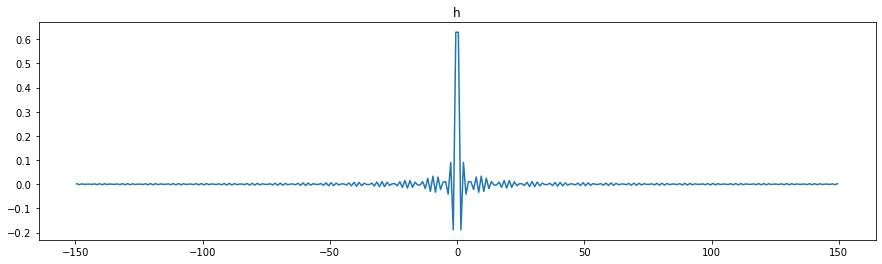

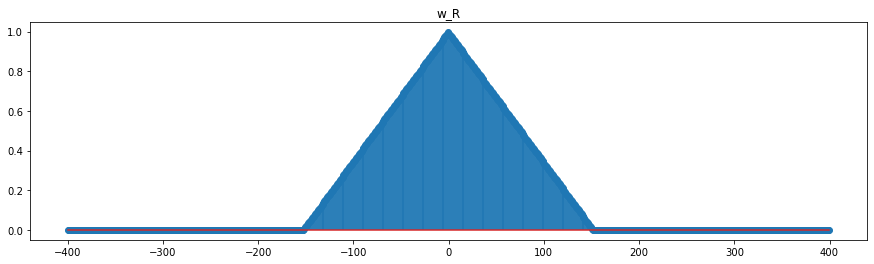

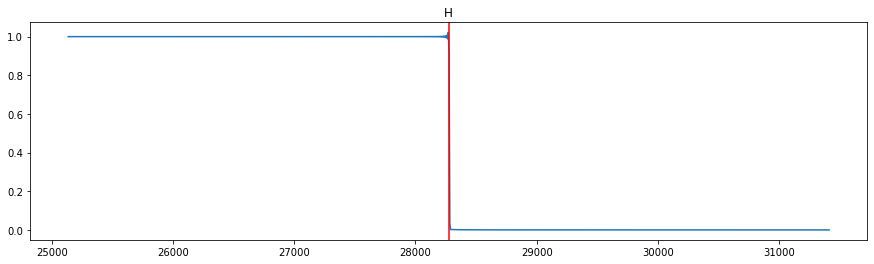

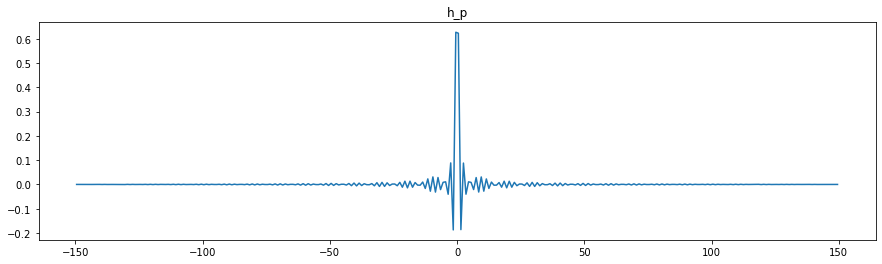

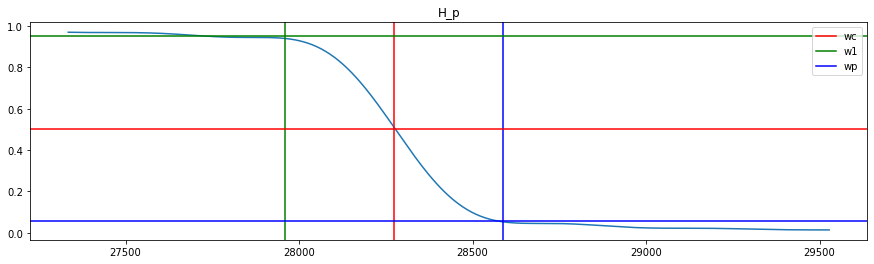

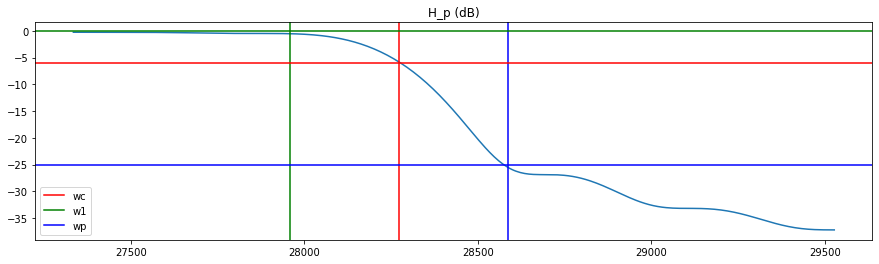

In [34]:
fs = 10_000    # Sampling Frequency
N = 10_000

# We define a window with size L, where L is defined by the desired transition bandwidth (since ideal is not practical)
# The equation is Δw = 2π(f1 - fp)/fs = 6.1π/(L+1)
TranBW = 100                  # Desired Transition Bandwidth
L = int(6.1*fs/(2 *TranBW))   # Length of Rectangular Window
print(f'L = {L}')

ws = 2*np.pi*fs # Sampling Frequency in Radians
T = 1/fs        # Sampling Period


fc = 4_500            # Corner Frequency of LPF

wc = 2 * np.pi * fc   # Corner Frequency in Radians

n = np.linspace(-N/2, N/2, N)    # To make things symmetrical, we start from -nT to nT

print(N*T/2)
print(fs/2)
f = np.linspace(0, ws , N)      # Create an array for frequencies up to the sampling frequency


# Here, we define the LPF in the time domain
h = np.zeros(N)
for i in range(N):
    if(n[i] == 0):    # When n = 0, we use l'hopital's rule to define h = cos(wcTN)wcT/π
        h[i] = 2*wc/ws
    else:
        h[i] = np.sin(wc * T * n[i])/(n[i] * np.pi)

        
#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 150
LEFT = N//2 - WIDTH
RIGHT = N//2 + WIDTH
#-----------------------------------------------------------------------------------------


# Here we graph h(nT)
plt.figure().set_figwidth(15)
plt.title('h')
plt.plot(n[LEFT:RIGHT], h[LEFT:RIGHT])           
plt.show()

#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 400
LEFT = N//2 - WIDTH
RIGHT = N//2 + WIDTH
#-----------------------------------------------------------------------------------------

# We define a window with size L, where L is defined by the desired transition bandwidth (since ideal is not practical)
# The equation is Δw = 2π(f1 - fp)/fs = 1.8π/(L+1)
wR = np.zeros(n.size)
lim = L/2

for i in (range(n.size)):
    if((n[i] > -lim) and (n[i] < 0)): # upward slope
        wR[i] = wR[i-1] + (2/L)
    elif((n[i] < lim) and (n[i] > 0)): # downward slope
        wR[i] = wR[i-1] - (2/L)

plt.figure().set_figwidth(15)
plt.stem(n[LEFT:RIGHT], wR[LEFT:RIGHT])
plt.title('w_R')
plt.show()    

# Het the Frequency domain representation of the LPF
H = np.abs(np.fft.fft(h))

#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 1000
LEFT = N//2 - WIDTH
RIGHT = N//2
#-----------------------------------------------------------------------------------------

plt.figure().set_figwidth(15)
plt.title('H')
plt.plot(f[LEFT:RIGHT], H[LEFT:RIGHT])
plt.axvline(wc, color ='r', label = 'fc')
plt.show()

#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 150
LEFT = N//2 - WIDTH
RIGHT = N//2 + WIDTH
#-----------------------------------------------------------------------------------------

h_p = h * wR

plt.figure().set_figwidth(15)
plt.plot(n[LEFT:RIGHT], h_p[LEFT:RIGHT])
plt.title('h_p')
plt.show()

H_p = np.abs(np.fft.fft(h_p))
#H_p = H_p / H_p[0]

plt.figure().set_figwidth(15)
plt.title('H_p')

#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 150
LEFT =  29*WIDTH
RIGHT = N//2 - 2*WIDTH
#-----------------------------------------------------------------------------------------

plt.plot(f[LEFT:RIGHT],(np.abs(H_p[LEFT:RIGHT])))
plt.axvline(wc, color ='r', label = 'wc')
#plt.axvline(62832 - LEFT, color='g', label='wp')
plt.axvline(wc-(np.pi*TranBW), color='g', label='w1')
plt.axvline(wc+(np.pi*TranBW), color='b', label='wp')
plt.axhline(10 ** (-25/20), color='b')
plt.axhline(0.5, color='r')
plt.axhline(0.95, color='g')
plt.legend() 
plt.show()


plt.figure().set_figwidth(15)
plt.title('H_p (dB)')
plt.plot(f[LEFT:RIGHT],20*np.log10(np.abs(H_p[LEFT:RIGHT])))
plt.axvline(wc, color ='r', label = 'wc')
#plt.axvline(62832 - LEFT, color='g', label='wp')
plt.axvline(wc-(np.pi*TranBW), color='g', label='w1')
plt.axvline(wc+(np.pi*TranBW), color='b', label='wp')
plt.axhline(-25, color='b')
plt.axhline(20 * np.log10(0.5), color='r')
plt.axhline(0, color='g')
plt.legend() 
plt.show()

## Hann Window

L = 310
0.5
5000.0


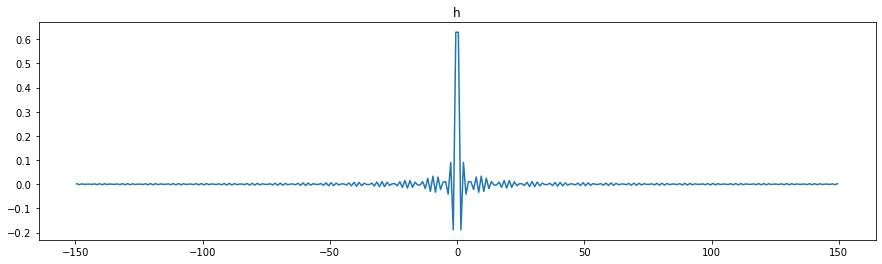

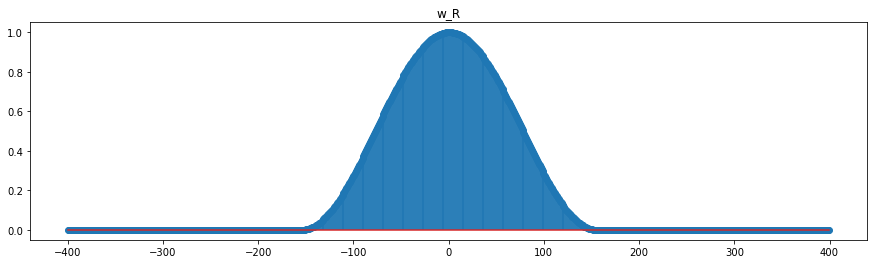

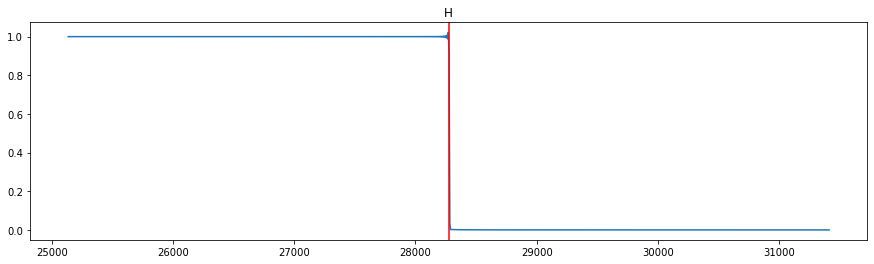

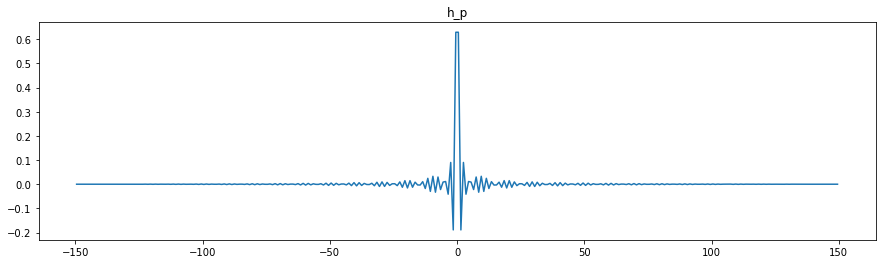

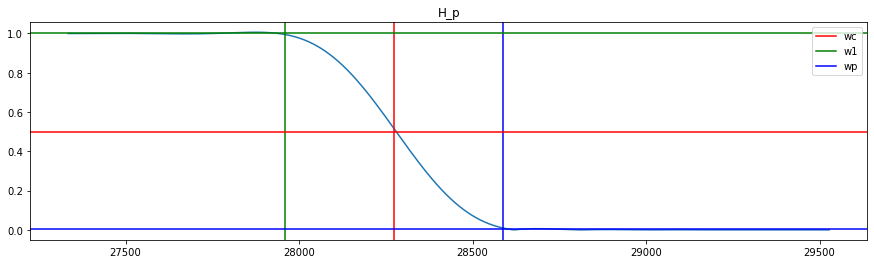

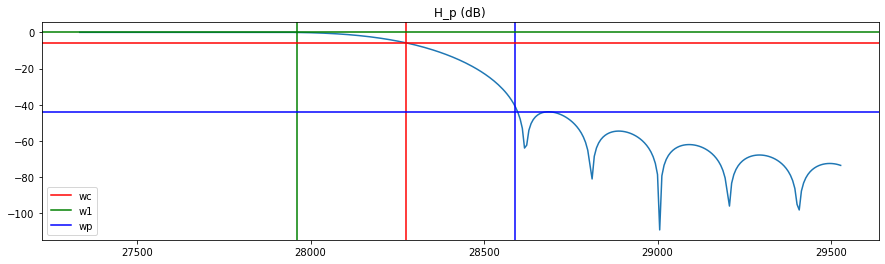

In [41]:
fs = 10_000    # Sampling Frequency
N = 10_000

# We define a window with size L, where L is defined by the desired transition bandwidth (since ideal is not practical)
# The equation is Δw = 2π(f1 - fp)/fs = 6.1π/(L+1)
TranBW = 100                  # Desired Transition Bandwidth
L = int(6.2*fs/(2 *TranBW))   # Length of Rectangular Window
print(f'L = {L}')

ws = 2*np.pi*fs # Sampling Frequency in Radians
T = 1/fs        # Sampling Period


fc = 4_500            # Corner Frequency of LPF

wc = 2 * np.pi * fc   # Corner Frequency in Radians

n = np.linspace(-N/2, N/2, N)    # To make things symmetrical, we start from -nT to nT

print(N*T/2)
print(fs/2)
f = np.linspace(0, ws , N)      # Create an array for frequencies up to the sampling frequency


# Here, we define the LPF in the time domain
h = np.zeros(N)
for i in range(N):
    if(n[i] == 0):    # When n = 0, we use l'hopital's rule to define h = cos(wcTN)wcT/π
        h[i] = 2*wc/ws
    else:
        h[i] = np.sin(wc * T * n[i])/(n[i] * np.pi)

        
#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 150
LEFT = N//2 - WIDTH
RIGHT = N//2 + WIDTH
#-----------------------------------------------------------------------------------------


# Here we graph h(nT)
plt.figure().set_figwidth(15)
plt.title('h')
plt.plot(n[LEFT:RIGHT], h[LEFT:RIGHT])           
plt.show()

#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 400
LEFT = N//2 - WIDTH
RIGHT = N//2 + WIDTH
#-----------------------------------------------------------------------------------------

# We define a window with size L, where L is defined by the desired transition bandwidth (since ideal is not practical)
# The equation is Δw = 2π(f1 - fp)/fs = 1.8π/(L+1)
wR = np.zeros(n.size)
lim = L/2

first = True
newIndex = 0
for i in (range(n.size)):
    if((n[i] > -lim) and (n[i] < lim)): 
        if(first):
            newIndex = i + L/2
            first = False
        m = i - newIndex
        wR[i] = (1 + np.cos(2 * np.pi * m/L))/2
    

plt.figure().set_figwidth(15)
plt.stem(n[LEFT:RIGHT], wR[LEFT:RIGHT])
plt.title('w_R')
plt.show()    

# Het the Frequency domain representation of the LPF
H = np.abs(np.fft.fft(h))

#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 1000
LEFT = N//2 - WIDTH
RIGHT = N//2
#-----------------------------------------------------------------------------------------

plt.figure().set_figwidth(15)
plt.title('H')
plt.plot(f[LEFT:RIGHT], H[LEFT:RIGHT])
plt.axvline(wc, color ='r', label = 'fc')
plt.show()

#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 150
LEFT = N//2 - WIDTH
RIGHT = N//2 + WIDTH
#-----------------------------------------------------------------------------------------

h_p = h * wR

plt.figure().set_figwidth(15)
plt.plot(n[LEFT:RIGHT], h_p[LEFT:RIGHT])
plt.title('h_p')
plt.show()

H_p = np.abs(np.fft.fft(h_p))
#H_p = H_p / H_p[0]

plt.figure().set_figwidth(15)
plt.title('H_p')

#--------- These variables are just for graphing specific parts of the response ----------
WIDTH = 150
LEFT =  29*WIDTH
RIGHT = N//2 - 2*WIDTH
#-----------------------------------------------------------------------------------------

plt.plot(f[LEFT:RIGHT],(np.abs(H_p[LEFT:RIGHT])))
plt.axvline(wc, color ='r', label = 'wc')
#plt.axvline(62832 - LEFT, color='g', label='wp')
plt.axvline(wc-(np.pi*TranBW), color='g', label='w1')
plt.axvline(wc+(np.pi*TranBW), color='b', label='wp')
plt.axhline(10 ** (-44/20), color='b')
plt.axhline(0.5, color='r')
plt.axhline(1, color='g')
plt.legend() 
plt.show()


plt.figure().set_figwidth(15)
plt.title('H_p (dB)')
plt.plot(f[LEFT:RIGHT],20*np.log10(np.abs(H_p[LEFT:RIGHT])))
plt.axvline(wc, color ='r', label = 'wc')
#plt.axvline(62832 - LEFT, color='g', label='wp')
plt.axvline(wc-(np.pi*TranBW), color='g', label='w1')
plt.axvline(wc+(np.pi*TranBW), color='b', label='wp')
plt.axhline(-44, color='b')
plt.axhline(20 * np.log10(0.5), color='r')
plt.axhline(0, color='g')
plt.legend() 
plt.show()